### III.	Exploratory data analysis (EDA): visualization, statistics (descriptive & inferential), trends  & relationships

**C. Analysis of flight delays: frequency, magnitude, reasons, temporal, spatial and carrier -based analysis** <br>
<ol>
    <li>Understand the relationship between variables
    <li>Delays at departure vs. delays at arrival
    <li>Delays @ Arrival (AD): frequency vs. magnitude
    <li>Flight delays distribution by reason
    <li>Flight delays carrier-based analysis
    <li>Flight delays temporal analysis     
</ol>

####  <font color=blue>Import python libraries and cleaned data file

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import squarify
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import datetime
import time
import random
import os
import warnings
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20, 10)

#magic panda line that renders the figure in a notebook
%matplotlib inline

In [2]:
#import file
flights_FINAL=pd.read_csv("/Users/iulialaptop/Documents/0. Career/Python_Projects_Springboard/2015 Flight Delays and Cancellations/Data set/flights_FINAL.csv", low_memory=False)

#reducing the file memory usage by changind the dtypes
dtype = {'YEAR':'int16', 'MONTH':'int8', 'DAY':'int8', 'DAY_OF_WEEK':'int8', 'ARL_CODE':'category', 'DEPARTURE_DELAY':'float32', 'TAXI_OUT':'float32', 'ELAPSED_TIME':'float32', 'AIR_TIME':'float32', 'DISTANCE':'int16','TAXI_IN':'float32','ARRIVAL_DELAY':'float32','DIVERTED':'int8', 'CANCELLED':'int8', 'CANCELLATION_REASON':'category', 'AIR_SYSTEM_DELAY':'float32', 'SECURITY_DELAY':'float32', 'AIRLINE_DELAY':'float32', 'LATE_AIRCRAFT_DELAY':'float32', 'WEATHER_DELAY':'float32'}
flights_FINAL = pd.read_csv("/Users/iulialaptop/Documents/0. Career/Python_Projects_Springboard/2015 Flight Delays and Cancellations/Data set/flights_FINAL.csv", low_memory=False, dtype=dtype)

#airlines file includes the airlines 2-letter code
airlines=pd.read_csv("/Users/iulialaptop/Documents/0. Career/Python_Projects_Springboard/2015 Flight Delays and Cancellations/Data set/airlines.csv")

#drop a few columns I know I will not use
flights_FINAL=flights_FINAL.drop(columns=['YEAR','LATITUDE_org', 'LONGITUDE_org','LATITUDE_dst','LONGITUDE_dst','COUNTRY_org','COUNTRY_dst'])

In [3]:
#drop unneccessary columns
flights_2=flights_FINAL.drop(columns=['DIVERTED','CANCELLED','CANCELLATION_REASON'])
#drop rows with null values fopr delays at arrival
flights_2=flights_2[flights_2['ARRIVAL_DELAY'].notnull()].reset_index(drop=True)

In [4]:
flights_FINAL['Date']=pd.to_datetime(flights_FINAL['Date'])

#### <font color=blue>6. Flight delays temporal analysis

In [5]:
# what is the % distribtuion of delays @ departure; create 3 bins: < 0 (early flights), no delays (=0), and > 0 (positive delays)
conditions=[(flights_2['DEPARTURE_DELAY']<0),
           (flights_2['DEPARTURE_DELAY']==0),
           (flights_2['DEPARTURE_DELAY']>0),]
values=['DD_N','DD_Z','DD_P']

flights_2['DD_NZP']=np.select(conditions, values)

In [6]:
# create 5 bins of delays at departure: < 0 (early flights), no delays (=0),0' to 15'(small delays considered on-time), 15' to 45' (medium delays), & >45' (large delays)
conditions=[(flights_2['DEPARTURE_DELAY']<0),
           (flights_2['DEPARTURE_DELAY']==0),
           (flights_2['DEPARTURE_DELAY']<=15),
           (flights_2['DEPARTURE_DELAY']<=45),
           (flights_2['DEPARTURE_DELAY']>45)]
values=['DD_N','DD_Z','DD_Ps','DD_Pm','DD_Px']

flights_2['DD_NZP_b']=np.select(conditions, values)

##### Monthly temporal analysis

In [7]:
#2015 avg. count DD per month
mo_avg_DD_0=round(flights_2['DEPARTURE_DELAY'].count()/12,0)
mo_avg_DD_0

476167.0

In [8]:
#2015 avg. count DD per month
mo_avg_DD_0=round(flights_2['DEPARTURE_DELAY'].sum()/12,0)
mo_avg_DD_0

4425902.0

In [9]:
#2015 avg. counts AD per month
mo_avg_AD_1=round(flights_2['ARRIVAL_DELAY'].count()/12,0)
mo_avg_AD_1

476167.0

In [10]:
#2015 avg. count AD per month
mo_avg_DD_0 = round(flights_2['ARRIVAL_DELAY'].sum() / 12, 0)
mo_avg_DD_0

2098497.0

In [11]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
DD_df_mo=flights_2.groupby('MONTH')['DEPARTURE_DELAY'].describe().reset_index()
DD_df_mo

,MONTH,count,mean,std,min,25%,50%,75%,max
0,1,457013.00,9.69,36.43,-48.00,-5.00,-2.00,9.00,1988.00
1,2,407663.00,11.78,39.82,-61.00,-4.00,-1.00,11.00,1587.00
2,3,492138.00,9.58,36.72,-41.00,-5.00,-1.00,8.00,1609.00
3,4,479251.00,7.63,34.26,-68.00,-5.00,-2.00,6.00,1542.00
4,5,489641.00,9.36,37.51,-45.00,-5.00,-2.00,7.00,1492.00
5,6,492847.00,13.87,43.04,-52.00,-4.00,-1.00,13.00,1522.00
6,7,514384.00,11.35,37.49,-41.00,-4.00,-1.00,10.00,1625.00
7,8,503956.00,9.87,36.78,-42.00,-5.00,-1.00,8.00,1878.00
8,9,462153.00,4.80,30.05,-56.00,-5.00,-3.00,2.00,1670.00
9,10,482878.00,4.94,30.53,-41.00,-5.00,-2.00,2.00,1573.00


In [12]:
AD_df_mo=flights_2.groupby('MONTH')['ARRIVAL_DELAY'].describe().reset_index()
AD_df_mo

,MONTH,count,mean,std,min,25%,50%,75%,max
0,1,457013.00,5.81,39.41,-82.00,-13.00,-4.00,10.00,1971.00
1,2,407663.00,8.32,43.16,-79.00,-12.00,-2.00,13.00,1627.00
2,3,492138.00,4.92,39.19,-87.00,-13.00,-4.00,9.00,1598.00
3,4,479251.00,3.16,36.58,-87.00,-13.00,-5.00,7.00,1554.00
4,5,489641.00,4.49,39.85,-76.00,-13.00,-5.00,7.00,1480.00
5,6,492847.00,9.60,44.99,-66.00,-12.00,-3.00,13.00,1508.00
6,7,514384.00,6.43,39.42,-73.00,-12.00,-4.00,10.00,1636.00
7,8,503956.00,4.61,38.71,-80.00,-13.00,-5.00,7.00,1898.00
8,9,462153.00,-0.77,32.32,-73.00,-15.00,-7.00,3.00,1665.00
9,10,482878.00,-0.78,32.72,-81.00,-14.00,-7.00,3.00,1555.00


In [13]:
#2015 avg. DD counts per month
DD_mo_avg=round(flights_2['DEPARTURE_DELAY'].count()/12,0)
DD_mo_avg

476167.0

In [14]:
#2015 avg. AD counts per month
AD_mo_avg=round(flights_2['ARRIVAL_DELAY'].count()/12,0)
AD_mo_avg

476167.0

In [15]:
z=flights_2['MONTH'].count()
z

5714008

In [16]:
x=flights_2['DEPARTURE_DELAY'].count()
x

5714008

In [17]:
#create 2 df for the early and delayed flights
flights_DDN=flights_2[flights_2['DD_NZP']=='DD_N'] #flights with negative delays (early leaving/arrival)
flights_DDP=flights_2[flights_2['DD_NZP']=='DD_P'] #flights with positive delays (late leaving/arrival)

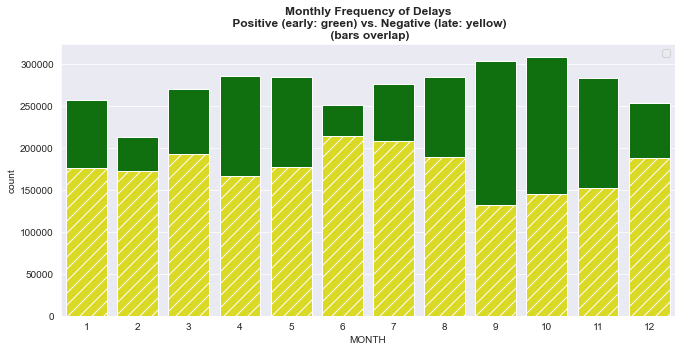

In [18]:
plt.figure(figsize=(11,5))
ax1=sns.countplot(x='MONTH', data=flights_DDN, color='green')
ax2=sns.countplot(x='MONTH', data=flights_DDP, color='yellow', saturation=0.7,hatch = '//')
plt.title('Monthly Frequency of Delays\n Positive (early: green) vs. Negative (late: yellow)\n (bars overlap)', fontsize=12, fontweight='bold')
plt.legend('x','y',loc='upper right')

In [19]:
delays_mo=flights_2.groupby('MONTH')['DD_NZP'].value_counts().to_frame()
delays_mo.rename(columns={delays_mo.columns[0]:'Counts'}, inplace=True)
delays_mo.reset_index(inplace=True)

Text(0.5, 1.0, 'Monthly Frequency of Delays\n Positive (early) vs. Negative (late) vs. No delays\n')

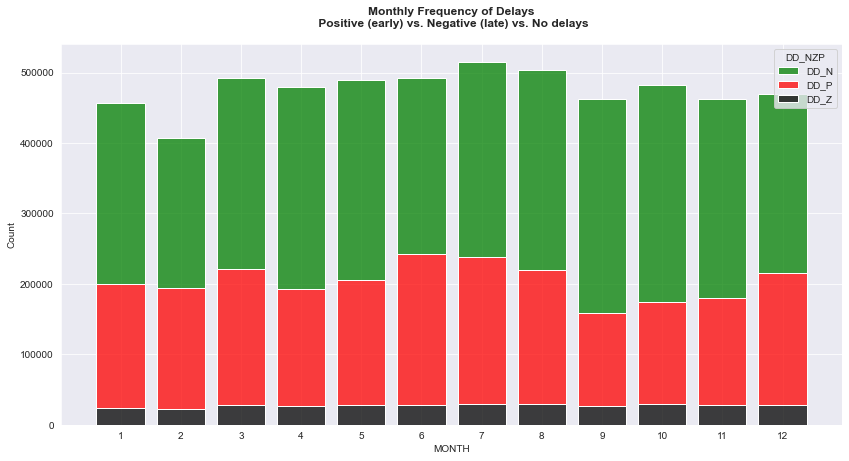

In [20]:
## create a stacked bar chart for monthly counts
delays_mo['MONTH']=delays_mo['MONTH'].astype(str)
plt.figure(figsize=(14,7))
AD_colors3={'DD_N':'green','DD_Z':'black', 'DD_P':'red'}
ax = sns.histplot(data=delays_mo,x='MONTH',
    weights='Counts',              
    hue='DD_NZP',
    multiple='stack',
    palette= AD_colors3,
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8)
plt.title('Monthly Frequency of Delays\n Positive (early) vs. Negative (late) vs. No delays\n', fontsize=12, fontweight='bold')

Text(0.5, 1.0, 'Monthly Average of Delays at Departure (blue) vs. Arrival (green)\nMean delays in minutes')

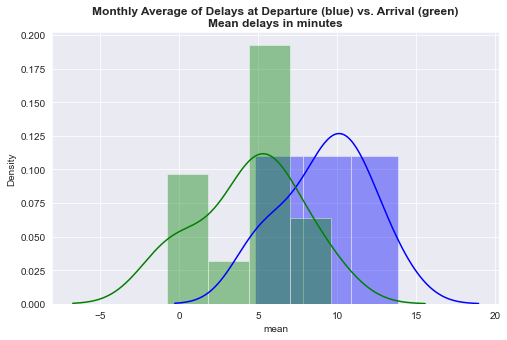

In [21]:
#comparison of distribution between count delays at departure vs. arrival
plt.figure(figsize=(8,5))
sns.distplot(DD_df_mo['mean'], color='blue')
sns.distplot(AD_df_mo['mean'], color='green')
plt.title('Monthly Average of Delays at Departure (blue) vs. Arrival (green)\nMean delays in minutes', fontsize=12, fontweight='bold')

Text(0.5, 0, 'Months')

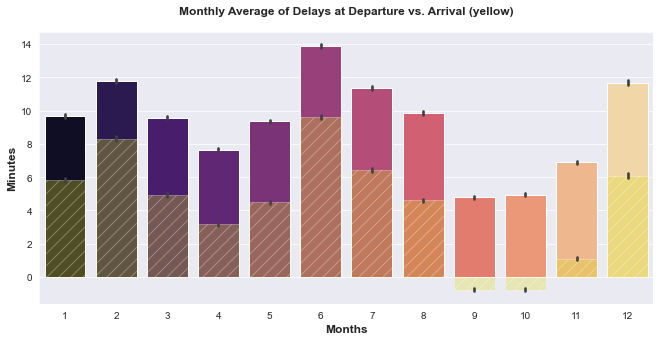

In [22]:
#Distribution of delays at arrival (AD) vs. Departure by month
plt.figure(figsize=(11,5))
sns.barplot(x='MONTH', y='DEPARTURE_DELAY', data=flights_2, palette='magma')
sns.barplot(x='MONTH', y='ARRIVAL_DELAY', data=flights_2, color='yellow', hatch = '//',alpha=0.3)

plt.title('Monthly Average of Delays at Departure vs. Arrival (yellow)\n', fontsize=12, fontweight='bold')
plt.ylabel('Minutes', fontsize=12, fontweight='bold')
plt.xlabel('Months', fontsize=12, fontweight='bold')

Text(0, 0.5, 'Minutes')

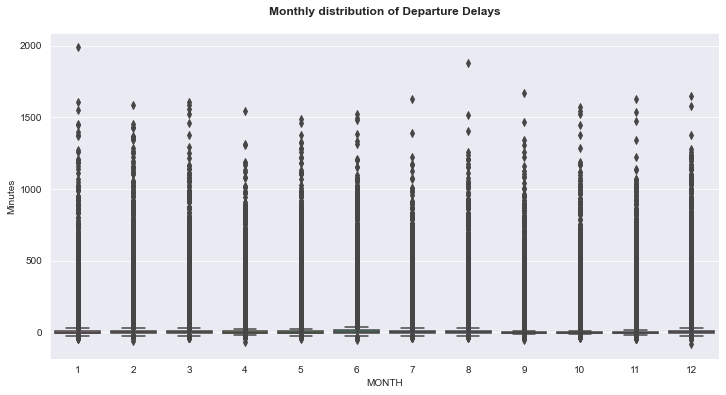

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(x='MONTH',y='DEPARTURE_DELAY', data=flights_2)
plt.title('Monthly distribution of Departure Delays\n', fontsize=12, fontweight='bold')
plt.ylabel('Minutes')

Text(0, 0.5, 'Minutes')

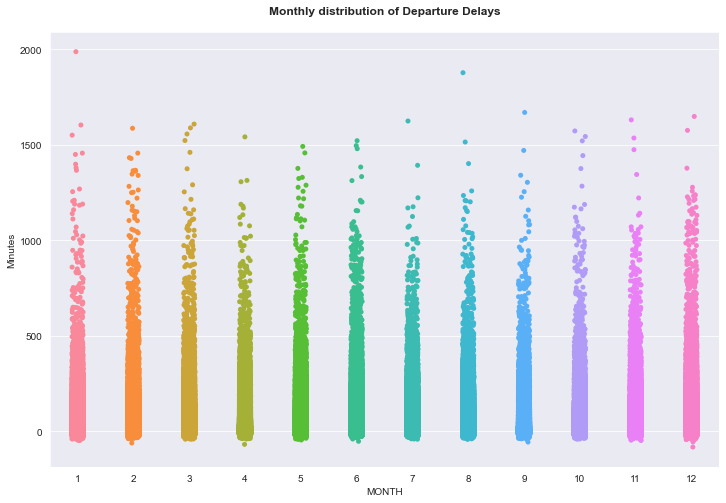

In [24]:
plt.figure(figsize=(12,8))
sns.stripplot(x='MONTH',y='DEPARTURE_DELAY', data=flights_2, jitter=True)
plt.title('Monthly distribution of Departure Delays\n', fontsize=12, fontweight='bold')
plt.ylabel('Minutes')

##### Temporal analysis by weekday

In [25]:
delays_wkd=flights_2.groupby('DAY_OF_WEEK')['DD_NZP'].value_counts().to_frame()
delays_wkd.rename(columns={delays_wkd.columns[0]:'Counts'}, inplace=True)
delays_wkd.reset_index(inplace=True)
delays_wkd

,DAY_OF_WEEK,DD_NZP,Counts
0,1,DD_N,471188
1,1,DD_P,321621
2,1,DD_Z,48985
3,2,DD_N,487161
4,2,DD_P,294361
5,2,DD_Z,45877
6,3,DD_N,494064
7,3,DD_P,301813
8,3,DD_Z,47365
9,4,DD_N,475451


Text(0.5, 1.0, 'Frequency of Delays by Weekday\n Positive (early) vs. Negative (late) vs. No delays\n')

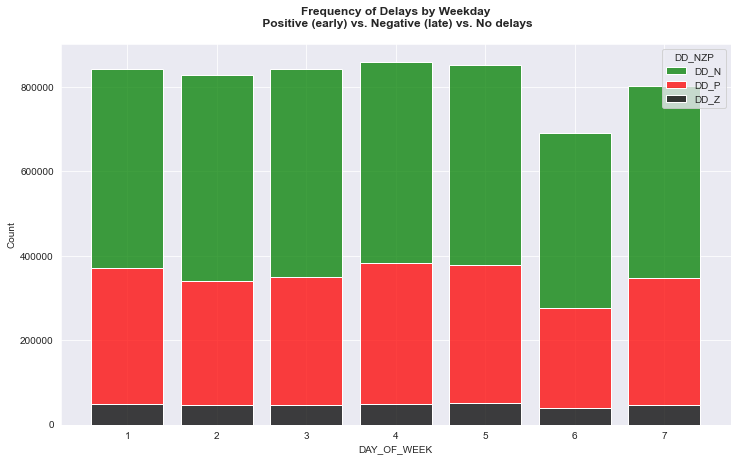

In [26]:
## create a stacked bar chart
delays_wkd['DAY_OF_WEEK']=delays_wkd['DAY_OF_WEEK'].astype(str)
plt.figure(figsize=(12,7))
DD_colors3={'DD_N':'green','DD_Z':'black', 'DD_P':'red'}
ax = sns.histplot(data=delays_wkd,x='DAY_OF_WEEK',
    weights='Counts',              
    hue='DD_NZP',
    multiple='stack',
    palette= DD_colors3,
    # Add white borders to the bars.
    edgecolor='white',
    # Shrink the bars a bit so they don't touch.
    shrink=0.8)
plt.title('Frequency of Delays by Weekday\n Positive (early) vs. Negative (late) vs. No delays\n', fontsize=12, fontweight='bold')

In [27]:
DD_df_wkd=flights_2.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].describe().reset_index()
DD_df_wkd

,DAY_OF_WEEK,count,mean,std,min,25%,50%,75%,max
0,1,841794.00,10.76,40.05,-61.00,-5.00,-1.00,8.00,1625.00
1,2,827399.00,9.10,36.80,-48.00,-5.00,-2.00,7.00,1609.00
2,3,843242.00,8.60,35.21,-56.00,-5.00,-2.00,7.00,1589.00
3,4,857886.00,9.88,36.93,-45.00,-5.00,-1.00,8.00,1649.00
4,5,851387.00,9.37,35.55,-55.00,-5.00,-1.00,8.00,1988.00
5,6,689745.00,7.73,35.83,-68.00,-5.00,-2.00,5.00,1878.00
6,7,802555.00,9.33,37.32,-82.00,-5.00,-2.00,7.00,1670.00


In [28]:
AD_df_wkd=flights_2.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].describe().reset_index()
AD_df_wkd

,DAY_OF_WEEK,count,mean,std,min,25%,50%,75%,max
0,1,841794.00,6.00,42.62,-81.00,-13.00,-5.00,9.00,1636.00
1,2,827399.00,4.25,39.04,-80.00,-13.00,-5.00,7.00,1598.00
2,3,843242.00,3.85,37.41,-82.00,-13.00,-5.00,7.00,1576.00
3,4,857886.00,5.67,39.42,-87.00,-12.00,-4.00,9.00,1636.00
4,5,851387.00,4.76,37.88,-79.00,-13.00,-4.00,9.00,1971.00
5,6,689745.00,1.85,38.18,-87.00,-14.00,-6.00,5.00,1898.00
6,7,802555.00,3.96,39.82,-80.00,-14.00,-5.00,7.00,1665.00


Text(0.5, 1.0, 'Average of Delays at Departure (blue) vs. Arrival (green)\n by Weekday, avg. in minutes')

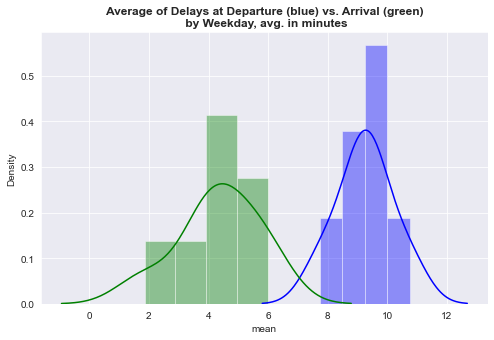

In [29]:
plt.figure(figsize=(8,5))
sns.distplot(DD_df_wkd['mean'], color='blue')
sns.distplot(AD_df_wkd['mean'], color='green')
plt.title('Average of Delays at Departure (blue) vs. Arrival (green)\n by Weekday, avg. in minutes', fontsize=12, fontweight='bold')

In [30]:
z=flights_2.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean()

<AxesSubplot:xlabel='ARRIVAL_DELAY', ylabel='Density'>

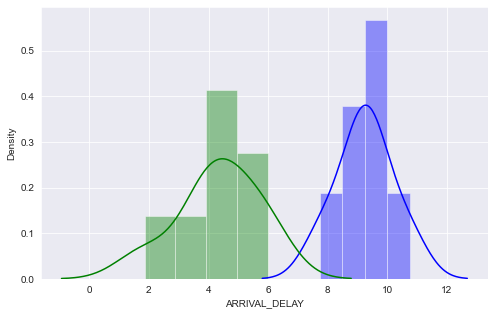

In [31]:
plt.figure(figsize=(8,5))
sns.distplot(flights_2.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean(), color='blue')
sns.distplot(flights_2.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean(), color='green')

In [32]:
x=round(flights_2['DEPARTURE_DELAY'].count()/7,0)
x

816287.0

Text(0.5, 0, 'Months')

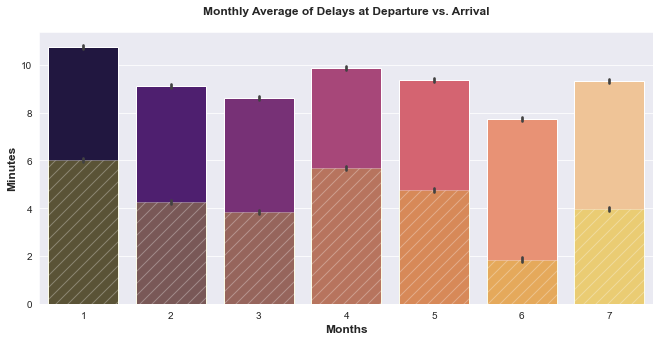

In [33]:
#Distribution of delays at arrival (AD)by month
plt.figure(figsize=(11,5))
sns.barplot(x='DAY_OF_WEEK', y='DEPARTURE_DELAY', data=flights_2, palette='magma')
sns.barplot(x='DAY_OF_WEEK', y='ARRIVAL_DELAY', data=flights_2, color='yellow', hatch = '//',alpha=0.3)

plt.title('Monthly Average of Delays at Departure vs. Arrival\n', fontsize=12, fontweight='bold')
plt.ylabel('Minutes', fontsize=12, fontweight='bold')
plt.xlabel('Months', fontsize=12, fontweight='bold')

Text(0, 0.5, 'Minutes')

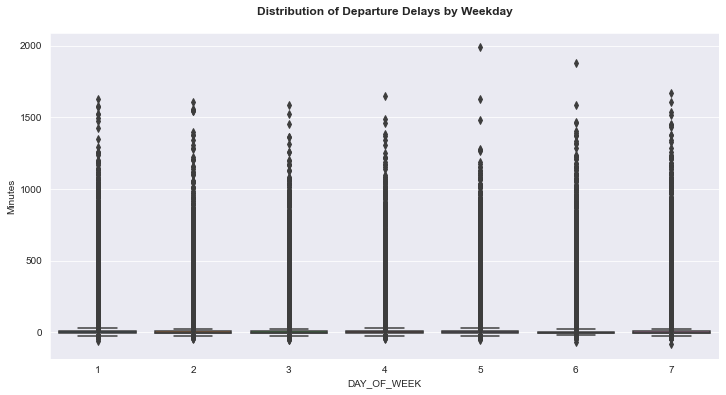

In [34]:
plt.figure(figsize=(12,6))
sns.boxplot(x='DAY_OF_WEEK',y='DEPARTURE_DELAY', data=flights_2)
plt.title('Distribution of Departure Delays by Weekday\n', fontsize=12, fontweight='bold')
plt.ylabel('Minutes')

Text(0, 0.5, 'Minutes')

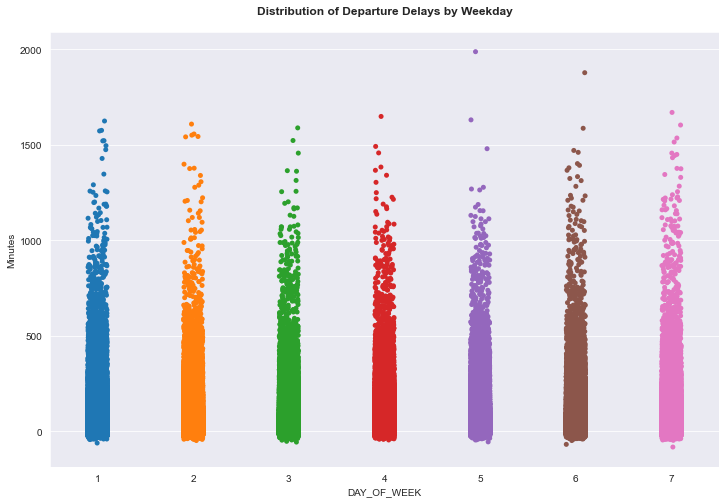

In [35]:
plt.figure(figsize=(12,8))
sns.stripplot(x='DAY_OF_WEEK',y='DEPARTURE_DELAY', data=flights_2, jitter=True)
plt.title('Distribution of Departure Delays by Weekday\n', fontsize=12, fontweight='bold')
plt.ylabel('Minutes')

##### Temporal analysis by time of the day

Text(0, 0.5, 'Minutes')

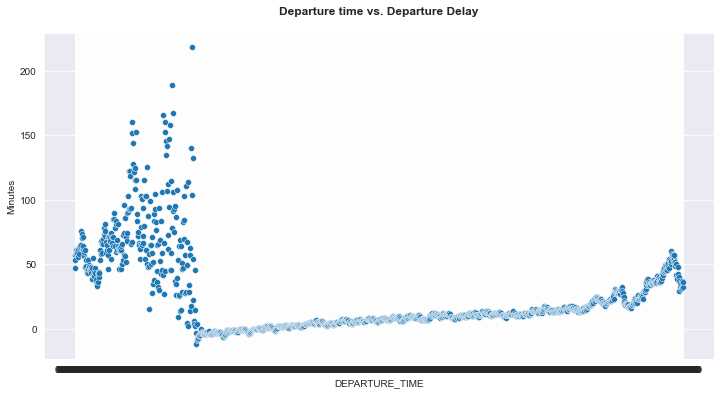

In [36]:
x=flights_2.groupby('DEPARTURE_TIME')['DEPARTURE_DELAY'].mean().to_frame().reset_index()
plt.figure(figsize=(12,6))
sns.scatterplot(x='DEPARTURE_TIME', y='DEPARTURE_DELAY', data=x)
plt.title('Departure time vs. Departure Delay\n', fontsize=12, fontweight='bold')
plt.ylabel('Minutes')

<AxesSubplot:xlabel='SCHEDULED_DEPARTURE', ylabel='DEPARTURE_DELAY'>

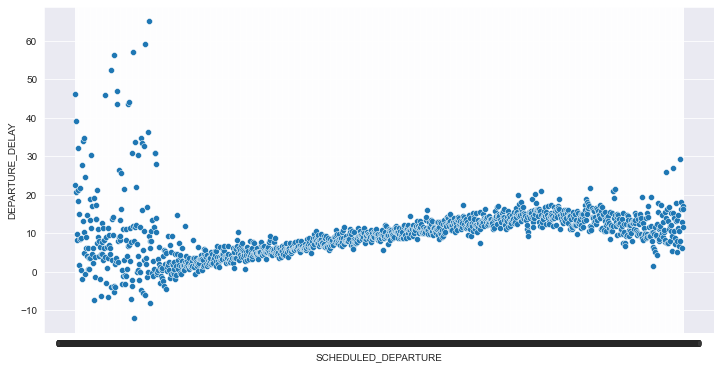

In [37]:
y=flights_2.groupby('SCHEDULED_DEPARTURE')['DEPARTURE_DELAY'].mean().to_frame().reset_index()
plt.figure(figsize=(12,6))
sns.scatterplot(x='SCHEDULED_DEPARTURE', y='DEPARTURE_DELAY', data=y)